# Linear regression in Python

## Goals of this lecture

- Implementing linear regression in `statsmodels`.  
- Interpreting model summaries:
   - Interpreting *coefficients* for **continuous** data.  
   - Interpreting *coefficients* for **categorical** data.  
- Extracing mdoel **predictions**.
- Basic model evaluation: $R^2$.  


##### Libraries

In [1]:
## Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import scipy.stats as ss

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # makes figs nicer!

## Regression in Python

There are many packages for implementing **linear regression** in Python, but we'll be focusing on [`statsmodels`](https://www.statsmodels.org/stable/index.html).

### Loading our first dataset

In [7]:
df_income = pd.read_csv("data/models/income.csv")
df_income.head(3)

,Education,Seniority,Income
0,21.586207,113.103448,99.917173
1,18.275862,119.310345,92.579135
2,12.068966,100.689655,34.678727


### Exploratory visualization

Does `Education` correlate with `Income`?

<AxesSubplot:xlabel='Education', ylabel='Income'>

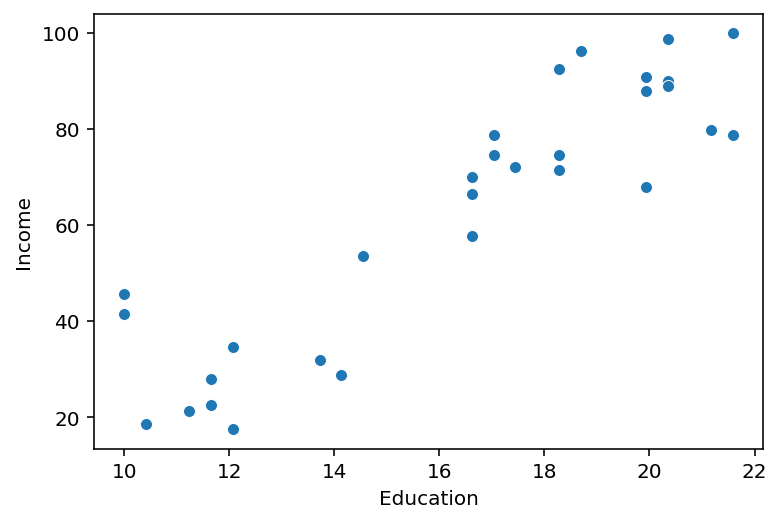

In [10]:
sns.scatterplot(data = df_income, x = "Education", y = "Income")

### Building a regression model

We can build a regression model using [`statsmodels.formula.api.ols`](https://www.statsmodels.org/dev/generated/statsmodels.formula.api.ols.html), here imported as `smf`.

```python
smf.ols(data = df_name, formula = "Y ~ X").fit()
```

In [12]:
mod = smf.ols(data = df_income, formula = "Income ~ Education").fit()
type(mod)

statsmodels.regression.linear_model.RegressionResultsWrapper

#### Inspecting output

In [18]:
mod.summary() ### Lots of stuff here!

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     120.8
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           1.15e-11
Time:                        14:55:27   Log-Likelihood:                -115.90
No. Observations:                  30   AIC:                             235.8
Df Residuals:                      28   BIC:                             238.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -41.9166      9.769     -4.291      0.000     -61.927     -21.906
Education      6.3872      0.581     10.990      0.000       5.197       7.578
==============================================================================
Omnibus:                        0.561   Durbin-Watson:                   2.194
Prob(Omnibus):                  0.756   Jarque-Bera (JB):                0.652
Skew:                           0.140   Prob(JB):                        0.722
Kurtosis:                       2.335   Cond. No.                         75.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Extracing specific information

In [25]:
## coefficients
mod.params

Intercept   -41.916612
Education     6.387161
dtype: float64

In [26]:
## standard errors
mod.bse

Intercept    9.768949
Education    0.581172
dtype: float64

In [28]:
## p-values for coefficients
mod.pvalues

Intercept    1.918257e-04
Education    1.150567e-11
dtype: float64

## Interpreting our model

### The linear equation

Recall that the linear equation is written:

$Y = \beta_0 + \beta_1 * X_1 + \epsilon$

How would these terms **map onto** the coefficients below?

In [33]:
## Coefficients
mod.params

Intercept   -41.916612
Education     6.387161
dtype: float64

#### Rewriting the linear equation

We can *insert* our coefficients into the equation.

$Y = -41.92 + 6.39 * X_1 + \epsilon$

Which can then be used to generate a prediction for a given value of $X$.

In [34]:
x = 20
y = -41.92 + 6.39 * x
print(y) ### our predicted value of Y, given X!

85.88


#### Check-in

Write a function called `predict_y(x)` which takes in a value `x` and outputs a prediction based on these learned coefficients.

In [35]:
### Your code here

#### Solution

In [36]:
def predict_y(x):
    return -41.92 + 6.39 * x

In [41]:
predict_y(10)

21.979999999999997

In [42]:
predict_y(30)

149.77999999999997

### Understanding the *intercept*

> The **intercept** term ($\beta_0$) is the predicted value of $\hat{Y}$ when $X = 0$.

What does this `Intercept` value mean here?

In [43]:
## Coefficients
mod.params

Intercept   -41.916612
Education     6.387161
dtype: float64

#### The intercept and the linear equation

If $X = 0$, the linear equation reduces to:

$Y = -41.92 + \epsilon$


In [46]:
predict_y(0) ### predicted value when x = 0

-41.92

### Understanding the *slope*

> For a **continuous** variable, the *slope* is the predicted change in $Y$ for every 1-unit change in $X$.

What does this *slope* term mean here?

In [47]:
## Coefficients
mod.params

Intercept   -41.916612
Education     6.387161
dtype: float64

### Check-in: more practice with `statsmodels`

Build a regression model predicting `Income` from `Seniority`. What are the `params`? What do they mean?

In [48]:
### Your code here

#### Solution

In [60]:
mod_seniority = smf.ols(data = df_income, formula = "Income ~ Seniority").fit()
mod_seniority.params

Intercept    39.158326
Seniority     0.251288
dtype: float64


- Fitting and interpreting linear models.
   - Interpreting intercept.
   - Interpreting slopes.
      - Categorical predictors.
      - Continuous predictors.
   - Use *lots* of examples.

Outline for lecture 2:


- Other information the model gives us:
   - Standard errors for coefficients.
   - p-values for coefficients.
   - $R^2$.  
- Extracting *predictions* from the model.
- Measuring model **error**, and returning to *assumptions*.  
   - Standard error of the estimate.
   - Normality of residuals.
   - Homoscedasticity.